# 3 - Seleção de Features

## 3.1 - Importando bibliotecas

In [95]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score

## 3.1 - Seleção de Features - Conceito
 vamos abordar o tema de seleção de features em algoritmos supervisionados. A seleção de features é importante para melhorar a precisão e eficiência dos modelos de IA. Ao identificar e selecionar as features mais relevantes, podemos reduzir a dimensionalidade dos dados, mitigar o impacto de features irrelevantes ou redundantes e melhorar a capacidade de generalização dos modelos. Além disso, a seleção adequada de features facilita a interpretabilidade do modelo e aumenta a confiança nas previsões. Vamos explorar diferentes métodos de seleção de features, como filtros estatísticos, wrapper methods, embedded methods e redução de dimensionalidade. Também veremos exemplos práticos no código.

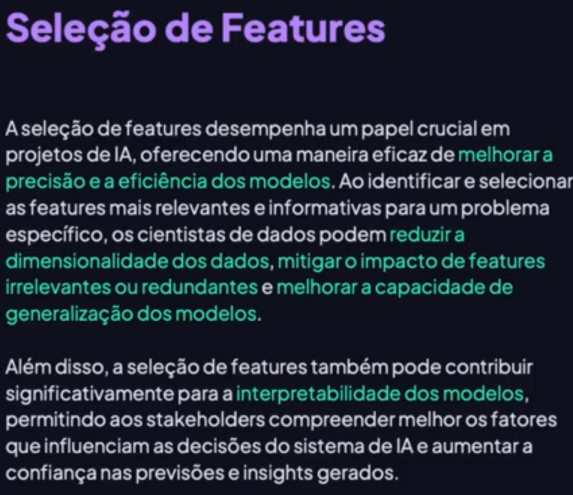

## 3.2 - Carga dos Dados e RFE - Regressão
 vamos aprender sobre seleção automática de características usando o scikit-learn. Vou explicar três técnicas: Recursive Feature Elimination (RFE), RFE-CV e SelectModule. Vamos importar as bibliotecas necessárias e carregar o dataset de colesterol. Em seguida, vamos treinar o modelo com RFE, que seleciona as características mais importantes. Vou explicar como o RFE funciona, usando um estimador e definindo a quantidade de características desejadas. Vamos analisar as features selecionadas e o ranking das demais. Também vamos avaliar a performance do modelo usando o MinSquaredError. No próximo vídeo, continuaremos explorando outras técnicas de seleção de características.

In [96]:
# Carregar dataset
df = pd.read_csv('dataset_colesterol.csv')
df.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [98]:
# Tratar Nulo

# Coletar medidas das variáveis categóricas (Moda)
moda_grupo_sang = df['Grupo Sanguíneo'].mode()
moda_fumante = df['Fumante'].mode()
moda_nivel_atividade = df['Nível de Atividade'].mode()

In [99]:
# Coletar medidas das variáveis numéricas (Mediana)
mediana_idade = df.Idade.median()
mediana_peso = df.Peso.median()
mediana_altura = df.Altura.median()

In [100]:
# Imputar quando valores são ausentes
# A moda pode resultar em mais de um valor, por isso pegar a primeira que está no índice 0
df.fillna(value={'Grupo Sanguíneo': moda_grupo_sang[0],
                                'Fumante': moda_fumante[0],
                                'Nível de Atividade': moda_nivel_atividade[0],
                                'Idade': mediana_idade,
                                'Peso': mediana_peso,
                                'Altura': mediana_altura}, inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   float64
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [102]:
# ajustar Data Frame
df.drop('Id', axis=1, inplace=True)

In [103]:
# Aplicar o OneHotEncoder
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [104]:
# DF Atualizado
df.head(2)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,0,0,1,0,0,1,0,1,0
1,68.0,105.0,184.0,236.98,1,0,0,0,1,0,0,0,1


## 3.3 - Treinar modelo de regressao linear multipla com RFE
 vamos aprender sobre seleção automática de características usando o scikit-learn. Vou explicar três técnicas: Recursive Feature Elimination (RFE), RFE-CV e SelectModule. Vamos importar as bibliotecas necessárias e carregar o dataset de colesterol. Em seguida, vamos treinar o modelo com RFE, que seleciona as características mais importantes. Vou explicar como o RFE funciona, usando um estimador e definindo a quantidade de características desejadas. Vamos analisar as features selecionadas e o ranking das demais. Também vamos avaliar a performance do modelo usando o MinSquaredError. No próximo vídeo, continuaremos explorando outras técnicas de seleção de características.

In [105]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df.Colesterol

In [106]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [107]:
# Treinar o modelo com RFE (Recursive Feature Elimination)
# Uso um estimador e defino uma quantidade de features (dois hiperparâmetros)
# O RFE faz iterações iniciando com todas as features e eliminando a cada iteração até atingir a quantidade definida
# Elimina as features menos importantes
rfe_method = RFE(estimator=LinearRegression(), n_features_to_select=4)
rfe_method.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=4)

In [108]:
# Quais features foram selecionadas
X_train.columns[(rfe_method.get_support())]

Index(['Peso', 'Altura', 'Fumante_Sim', 'Nível de Atividade_Alto'], dtype='object')

Segue a imagem com resultado da aula que deu diferente, mas ao selecionar 4 features com n_features_to_select=4, o resultado bate <br>
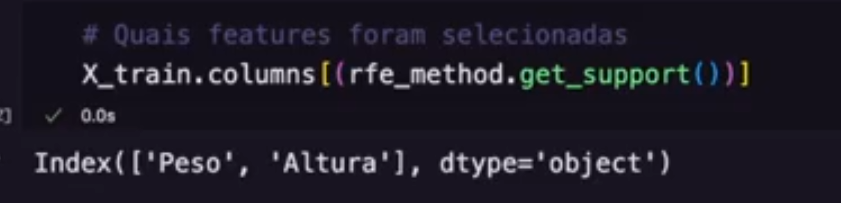

In [109]:
# Ranking de Features
def mostrar_ranking(metodo_fs, X_train):

    # Obter ranking de features
    ranking = rfe_method.ranking_

    # Obter os nomes das features
    nomes_features = X_train.columns.to_list()

    # Crie um Dataframe com os rankings e os nomes das features
    df_ranking = pd.DataFrame({'Feature': nomes_features, 'Ranking': ranking})

    # Ordene o DataFrame pelo Ranking
    df_ranking = df_ranking.sort_values(by='Ranking')

    # Exibir Ranking
    print(df_ranking)

In [110]:
# Ranking de features do RFE Regressão
mostrar_ranking(rfe_method, X_train)

                        Feature  Ranking
1                          Peso        1
2                        Altura        1
8                   Fumante_Sim        1
9       Nível de Atividade_Alto        1
4            Grupo Sanguíneo_AB        2
5             Grupo Sanguíneo_B        3
7                   Fumante_Não        4
3             Grupo Sanguíneo_A        5
11  Nível de Atividade_Moderado        6
10     Nível de Atividade_Baixo        7
6             Grupo Sanguíneo_O        8
0                         Idade        9


In [111]:
# Função para avaliar performance
def performance_regressao(modelo, X_test, y_test):
    # Faz a predição com o modelo no conjunto de testes
    y_pred = modelo.predict(X_test)

    # Avaliar o desempenho
    return mean_squared_error(y_test, y_pred, squared=False)

In [112]:
# Performance Regressão com RFE
performance_regressao(rfe_method, X_test, y_test)

g:\Meu Drive\projects_vscode\eda\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.074306440779798

Segue a imagem com resultado da aula que deu diferente
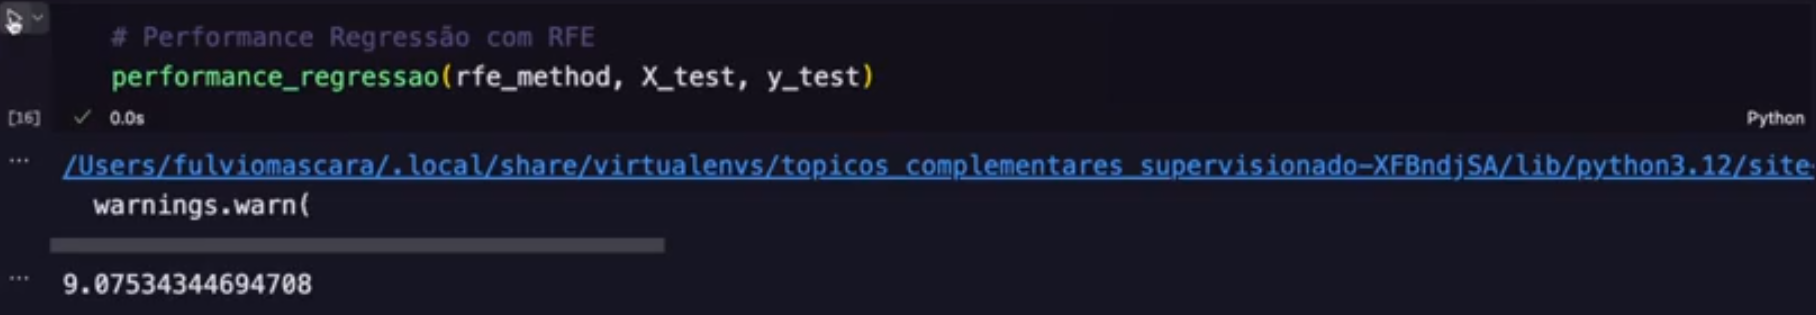

### 3.3.1 - Treinar sem RFE

In [113]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [114]:
# Performance Regressão sem RFE
performance_regressao(model_reg, X_test, y_test)

g:\Meu Drive\projects_vscode\eda\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.040245951911174

## 3.4 - Uso de RFECV - Regressão Linear
- Dando sequência, a gente vai agora fazer uma outra técnica de seleção de features que é muito parecida na verdade com o RFE, só que o RFE-CV.
- O RFE-CV faz a eliminação de features recursiva, mas usando o conceito de validação cruzada. Então nesse caso, ele vai fatiando o dataset no conceito de folds, onde você tem, se ele
separa, por exemplo, 5 folds. Então, ele usa 4 folds para treinar e uma para testar. 
- Depois ele vai iteirando nessas folds até ele treinar e depois ele tira uma média ou a métrica que você quiser do modelo chegando no modelo que é mais robusto e é uma das técnicas interessantes para você reduzir o overfitting.

In [115]:
rfe_method_cv = RFECV(estimator=LinearRegression(), min_features_to_select=6, cv=5)
rfe_method_cv.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), min_features_to_select=6)

In [116]:
# Performance Regressão com RFECV
performance_regressao(rfe_method_cv, X_test, y_test)

g:\Meu Drive\projects_vscode\eda\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.047574304437292

In [117]:
# Quais features foram selecionadas
X_train.columns[(rfe_method_cv.get_support())]

Index(['Peso', 'Altura', 'Grupo Sanguíneo_A', 'Grupo Sanguíneo_AB',
       'Grupo Sanguíneo_B', 'Fumante_Não', 'Fumante_Sim',
       'Nível de Atividade_Alto', 'Nível de Atividade_Baixo',
       'Nível de Atividade_Moderado'],
      dtype='object')

In [118]:
# Quantas Features de 12 foram Selecionadas
rfe_method_cv.n_features_

10

## 3.5 - Uso de SelectFromModel - Regressão

In [119]:
sfm_method = SelectFromModel(estimator=model_reg2, max_features=2, threshold=0.5)
sfm_method.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression(), max_features=2, threshold=0.5)

In [120]:
# Quais features foram selecionadas
X_train.columns[(sfm_method.get_support())]

Index(['Peso', 'Altura'], dtype='object')

In [121]:
# Treinar modelo com as features selecionadas
X_train_ajustado_reg = sfm_method.transform(X_train)
X_test_ajustado_reg = sfm_method.transform(X_test)
model_reg.fit(X_train_ajustado_reg, y_train)

LinearRegression()

In [122]:
# Performance do modelo com SelectFromModel
performance_regressao(model_reg, X_test_ajustado_reg, y_test)

g:\Meu Drive\projects_vscode\eda\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.086733223682526

## 3.6 - Carga dos Dados e Treinamento com RFE - Classificação Regressão Logística

In [123]:
# Carregar Dataset
df2 = pd.read_csv('./fruit_quality.csv')
df2.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [125]:
# Ajustar Data Frame

# Remover Coluna A_id, pois não tem poder preditivo
df2.drop(columns=['A_id'], axis=1, inplace=True)

# Tranformar a variável Quality em numérica (0 e 1)
# Convertendo pra int True se torna 1 e False 0
df2.Quality = (df2.Quality == 'good').astype(int)
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


In [126]:
# Treinar o modelo usando RFE

# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2.Quality

In [127]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [128]:
# Treinar o modelo com RFE (Recursive Feature Elimination)
# Uso um estimador e defino uma quantidade de features (dois hiperparâmetros)
# O RFE faz iterações iniciando com todas as features e eliminando a cada iteração até atingir a quantidade definida
# Elimina as features menos importantes
rfe_method = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe_method.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [129]:
# Quais features foram selecionadas
X_train.columns[(rfe_method.get_support())]

Index(['Size', 'Weight', 'Sweetness', 'Juiciness', 'Acidity'], dtype='object')

In [130]:
# Ranking de features do RFE Regressão
mostrar_ranking(rfe_method, X_train)

       Feature  Ranking
0         Size        1
1       Weight        1
2    Sweetness        1
4    Juiciness        1
6      Acidity        1
5     Ripeness        2
3  Crunchiness        3


In [131]:
# Função para avaliar performance
def performance_classificacao(modelo, X_test, y_test):
    # Faz a predição com o modelo no conjunto de testes
    y_pred = modelo.predict(X_test)

    # Avaliar o desempenho
    return f1_score(y_test, y_pred)

In [132]:
# Performance Regressão com RFE
performance_classificacao(rfe_method, X_test, y_test)

0.7738193869096934

## 3.7 - Modelo sem RFE - Classificação

In [133]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [134]:
# Performance Regressão com RFE
performance_classificacao(model_lr, X_test, y_test)

0.7787903893951947

## 3.8 - Uso de RFECV - Classificação
 continuamos nosso módulo de seleção de features, treinando um modelo com RFCV. Usamos o código da regressão logística e modificamos algumas coisas. Podemos escolher o número de features selecionadas e a métrica de validação cruzada. Neste caso, escolhemos o F1 weighted. A performance do modelo foi baixa, pois usamos apenas duas features. Podemos ajustar o número de features e ver como isso afeta a performance. O RFCV é útil para selecionar features com base em validação cruzada. No próximo vídeo, aplicaremos o Select From Model na regressão logística.

In [135]:
# Treinar modelo de regressão logística com RFECV
rfe_method_cv = RFECV(estimator=LogisticRegression(), min_features_to_select=4, cv=5, scoring='f1_weighted')
rfe_method_cv.fit(X_train, y_train)

RFECV(cv=5, estimator=LogisticRegression(), min_features_to_select=4,
      scoring='f1_weighted')

In [136]:
# Performance Regressão com RFECV
performance_regressao(rfe_method_cv, X_test, y_test)

g:\Meu Drive\projects_vscode\eda\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.473462423711393

In [137]:
# Quais features foram selecionadas
X_train.columns[(rfe_method_cv.get_support())]

Index(['Size', 'Weight', 'Sweetness', 'Juiciness', 'Ripeness', 'Acidity'], dtype='object')

In [138]:
# Quantas Features de 12 foram Selecionadas
rfe_method_cv.n_features_

6

## 3.9 - Uso de SelectFromModel - Classificação
 vamos finalizar o tópico de treinamento de modelos com o Select from Model. Vamos adaptar o modelo de regressão logística para o problema de classificação. Vamos testar o modelo com diferentes quantidades de features e ajustar o threshold. Em seguida, vamos avaliar as features selecionadas e treinar o modelo de regressão logística com essas features. Por fim, vamos comparar a performance desse modelo com o baseline. Também vamos explorar diferentes configurações de features e threshold. No final, concluímos mais um tópico de algoritmos supervisionados.

In [139]:
sfm_method = SelectFromModel(estimator=model_lr, max_features=2)
sfm_method.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(), max_features=2)

In [140]:
# Quais features foram selecionadas
X_train.columns[(sfm_method.get_support())]

Index(['Size', 'Sweetness'], dtype='object')

In [143]:
# Treinar modelo com as features selecionadas
X_train_ajustado_class = sfm_method.transform(X_train)
X_test_ajustado_class = sfm_method.transform(X_test)
model_lr.fit(X_train_ajustado_class, y_train)

LogisticRegression()

In [146]:
# Performance do modelo com SelectFromModel
performance_classificacao(model_lr, X_test_ajustado_class, y_test)

0.697171381031614